<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 13.1 MB/s eta 0:00:00


In [2]:
import torch
import torchvision


In [3]:
import torchvision.datasets
import torchvision.models

In [4]:
print(torch.__version__)

2.4.1+cu121


In [5]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [6]:
device

device(type='cpu')

In [7]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

In [8]:
train_dataset = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None,

)

100%|██████████| 26421880/26421880 [00:08<00:00, 3012251.54it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273810.40it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1499194.75it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12976128.00it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [9]:
test_dataset = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True,
    target_transform = None,
)

In [10]:
len(test_dataset)

10000

In [11]:
len(train_dataset)

60000

In [12]:
classes = train_dataset.classes

In [13]:
image, label = train_dataset[0]

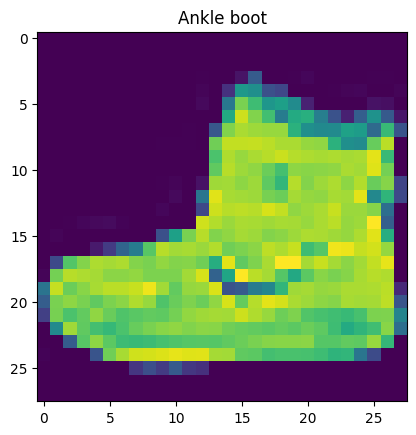

In [14]:
plt.imshow(image.squeeze())
plt.title(classes[label]);

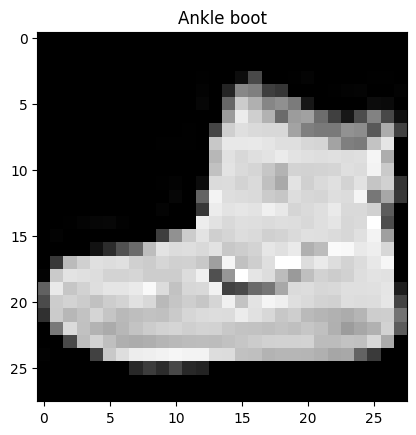

In [15]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(classes[label]);

In [16]:
torch.randint(0,len(train_dataset),(1,))

tensor([29392])

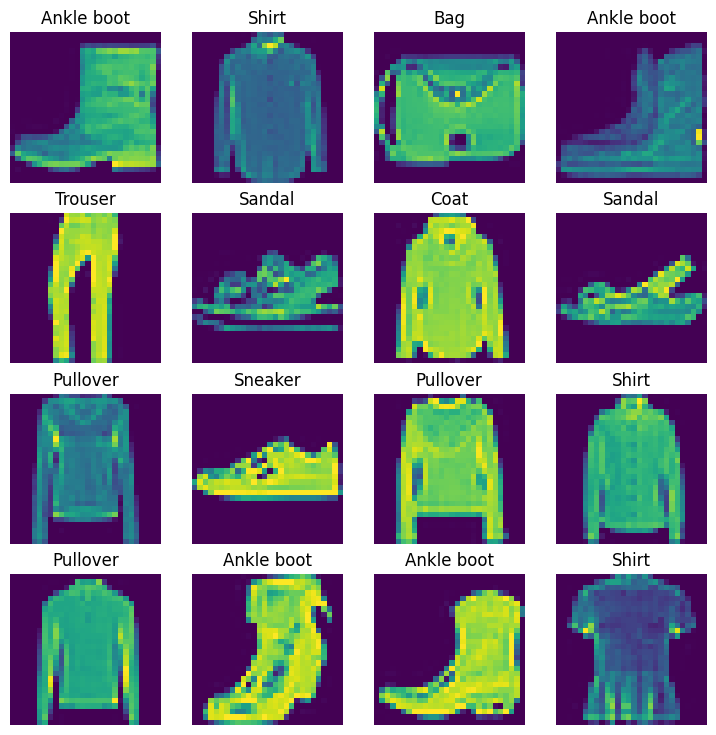

In [17]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
for i in range (1,17):
  j = torch.randint(0,len(train_dataset),size = [1]).item()
  # print(j)
  image, label = train_dataset[j]
  fig.add_subplot(4,4,i)
  plt.imshow(image.squeeze())
  plt.title(classes[label])
  plt.axis(False)
  # break

# **Preparing Data Loader**

In [18]:
from torch.utils.data import DataLoader

In [19]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [20]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [21]:
train_data = DataLoader(
    dataset = train_dataset,
    batch_size = 32,
    shuffle = True,
)

test_data = DataLoader(
    dataset = test_dataset,
    batch_size = 32,
    shuffle = False
)

In [22]:
train_data, test_data

(<torch.utils.data.dataloader.DataLoader at 0x795d4e483970>,
 <torch.utils.data.dataloader.DataLoader at 0x795d4e4835e0>)

In [23]:
len(train_data)

1875

In [24]:
train_batch,train_label = next(iter(train_data))

In [25]:
train_batch.shape

torch.Size([32, 1, 28, 28])

In [26]:
train_label.shape

torch.Size([32])

In [27]:
train_batch[0].squeeze().shape

torch.Size([28, 28])

21


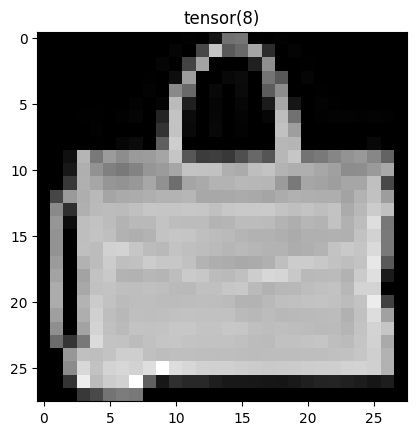

In [28]:
# torch.manual_seed(42)
j = torch.randint(0, len(train_batch), size = [1]).item()
print(j)
plt.imshow(train_batch[j].squeeze(), cmap = 'gray');
plt.title(train_label[j]);

# **Create a model**

In [29]:
import torch.nn as nn

In [30]:
class FashionMNSTv1(nn.Module):
  def __init__(self, input_shape, hidden_layer, output_shape):
    super().__init__()

    self.stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_layer),
        nn.Linear(hidden_layer, output_shape),
    )

  def forward(self,x):
    return self.stack(x)

In [31]:
model0 = FashionMNSTv1(input_shape = (28 * 28), hidden_layer = 10,output_shape = len(classes))
model0

FashionMNSTv1(
  (stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [32]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('The helper file already exists')
else:
  helper = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")


In [33]:
with open('/content/helper_function.py', 'wb') as f:
  f.write(helper.content)

In [34]:
from helper_function import accuracy_fn

In [35]:
# create loss adn accuracy
import torch.nn as nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(), lr =0.1)

# **Creating timer to track our time**

In [36]:
def print_time(start,end,device):
  total_time = end - start
  print(f'the time on {device} is {total_time}')
  return end-start

In [37]:
from timeit import default_timer as time


In [38]:
# Write the training loop
from tqdm.auto import tqdm
epochs = 3

start_timeon_cpu = time()
for epoch in tqdm(range(epochs)):
  print(f'The epoch is {epoch} ---->')

  train_loss = 0
  model0.train()
  for batch,(X,y) in enumerate(train_data):

    y_logits = model0(X)
    batch_loss = loss_fn(y_logits,y)
    train_loss += batch_loss.item()

    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()
    if batch % 400 ==0:
      print(f'training for the batch {batch * len(X)}/{len(train_dataset)}')
  train_loss /= len(train_data)
  model0.eval()
  test_acc, test_loss= 0,0

  with torch.inference_mode():
    for X,y in test_data:
      y_tlogits = model0(X)
      batch_loss = loss_fn(y_tlogits, y)
      test_loss += batch_loss.item()
      accuracy = accuracy_fn(y,y_tlogits.argmax(dim = 1))
      test_acc += accuracy

  test_loss /= len(test_data)
  test_acc /= len(test_data)
  end_time_on_cpu = time()
  totaltime = print_time(start_timeon_cpu, end_time_on_cpu, 'cpu')
  # print(start_timeon_cpu)
  # print(end_time_on_cpu)
  print(f'\nthe average training loss of epoch is {train_loss} the test_loss:{test_loss}, test_accuracy:{test_acc}\n')







  0%|          | 0/3 [00:00<?, ?it/s]

The epoch is 0 ---->
training for the batch 0/60000
training for the batch 12800/60000
training for the batch 25600/60000
training for the batch 38400/60000
training for the batch 51200/60000
the time on cpu is 15.661950649999994

the average training loss of epoch is 0.590876209918658 the test_loss:0.4986476888195775, test_accuracy:82.55790734824281

The epoch is 1 ---->
training for the batch 0/60000
training for the batch 12800/60000
training for the batch 25600/60000
training for the batch 38400/60000
training for the batch 51200/60000
the time on cpu is 28.05372111700001

the average training loss of epoch is 0.4756894632021586 the test_loss:0.48282686309121287, test_accuracy:82.58785942492013

The epoch is 2 ---->
training for the batch 0/60000
training for the batch 12800/60000
training for the batch 25600/60000
training for the batch 38400/60000
training for the batch 51200/60000
the time on cpu is 40.40149015

the average training loss of epoch is 0.4527096848448118 the test_l

# **Non linear model**

In [39]:
class FashionMNSTv1(nn.Module):
  def __init__(self, input_layers, hidden_layers, output_layers):
    super().__init__()
    self.stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_layers, hidden_layers),
        nn.ReLU(),
        nn.Linear(hidden_layers, output_layers),
        nn.ReLU()
    )

  def forward(self, x):
    return self.stack(x)

In [40]:
model1 = FashionMNSTv1((28 * 28), 10, len(classes))
model1

FashionMNSTv1(
  (stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [41]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model1.parameters(), lr = 0.1)


In [42]:
len(train_dataset)

60000

In [43]:
def train_step(model,train_data,loss_fn, optimizer):
  train_loss = 0
  model.train()
  for batch, (X,y) in enumerate(train_data):
    train_logits = model(X)
    batch_loss = loss_fn(train_logits, y)
    train_loss += batch_loss.item()

    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()
    if batch % 400 ==0:
      print(f'running {batch * len(X)}/ {len(train_dataset)}')
  train_loss /= len(train_data)
  print(f'the training loss :{train_loss}')

### Test Loop
def test_step(model,test_data,loss_fn,accuracy_fn):
  model.eval()
  test_loss, test_acc = 0,0
  for X,y in test_data:
    with torch.inference_mode():
      test_logits = model(X)
      batch_loss = loss_fn(test_logits, y)
      test_loss += batch_loss.item()
      batch_acc = accuracy_fn(y,test_logits.argmax(dim =1))
      test_acc += batch_acc
  test_loss /= len(test_data)
  test_acc /= len(test_data)
  print(f'testing_loss:{test_loss}, testing_acc:{test_acc}\n')




In [44]:
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'The results of epoch {epoch}')
  train_step(model1, train_data,loss_fn, optimizer)
  test_step(model1, test_data,loss_fn,accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

The results of epoch 0
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.628067782664299
testing_loss:0.5289402590772976, testing_acc:80.66094249201278

The results of epoch 1
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.4618522809823354
testing_loss:0.46185041511782443, testing_acc:83.54632587859425

The results of epoch 2
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.43029327214161556
testing_loss:0.4817427864042334, testing_acc:82.96725239616613



In [45]:
def eval_model(model,model_name, test_data, loss_fn, optimizer):
  model.eval()
  results = {}
  with torch.inference_mode():
    loss, acc =0,0
    for X,y in test_data:
      y_logits = model(X)
      y_preds = y_logits.argmax(dim = 1)

      loss_batch = loss_fn(y_logits, y)
      accuracy_batch = accuracy_fn(y,y_preds)
      loss += loss_batch.item()
      acc += accuracy_batch
    results['accuracy'] = acc/len(test_data)
    results['loss'] = loss/len(test_data)
    results['model_name'] = model_name
  return results


In [46]:
model1_results = eval_model(model1,'model1', test_data, loss_fn, optimizer)

In [47]:
model1_results

{'accuracy': 82.96725239616613,
 'loss': 0.4817427864042334,
 'model_name': 'model1'}

In [48]:
model0_results = eval_model(model0, 'model2', test_data, loss_fn, optimizer)

In [49]:
model0_results

{'accuracy': 83.21685303514377,
 'loss': 0.4835698929505226,
 'model_name': 'model2'}

# **Introducing the convnets**

In [50]:
class FashionMNSTv2(nn.Module):
    def __init__(self, input_shape, hidden_layer, output_shape):
        super().__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Correct the in_features here
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10 * 7 * 7, out_features=output_shape)
        )

    def forward(self, x):
        # print(f'The initial shape of x is {x.shape}')
        x = self.block1(x)
        # print(f'The output from block1 is {x.shape}')
        x = self.block2(x)
        # print(f'The output from block2 is {x.shape}')
        x = self.classifier(x)
        # print(f'The final output shape is {x.shape}')
        return x


In [51]:
model2 = FashionMNSTv2(input_shape = 1, hidden_layer = 10 , output_shape = len(classes))

In [52]:
model2

FashionMNSTv2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [53]:
# Create a Random Image

random_images = torch.randn(size = (32,3,28,28))

len(random_images)

32

In [54]:
testing_image = random_images[0]

In [55]:
l1 = nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 3)

In [56]:
test_output = l1(testing_image)

In [57]:
test_output.shape

torch.Size([10, 26, 26])

In [58]:
l1 = nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 5,stride = 2)
test_2 = l1(testing_image)

In [59]:
test_2.shape

torch.Size([10, 12, 12])

In [60]:
l_poo = nn.MaxPool2d(2)
test_3 = l_poo(testing_image)

In [61]:
test_3.shape

torch.Size([3, 14, 14])

In [62]:
l1.weight.shape

torch.Size([10, 3, 5, 5])

In [63]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params = model2.parameters(), lr= 0.1)

In [64]:
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'running epoch {epoch} --->')
  train_step(model2, train_data, loss_fn,optim)
  test_step(model2,test_data, loss_fn, accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

running epoch 0 --->
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.5532723986069361
testing_loss:0.39156850715414787, testing_acc:85.43330670926518

running epoch 1 --->
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.34986480870644254
testing_loss:0.34531639524684926, testing_acc:87.27036741214057

running epoch 2 --->
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.31218629287282623
testing_loss:0.3383421697460424, testing_acc:87.71964856230032



In [65]:
model2_results = eval_model(model2,'model3',test_data, loss_fn, optimizer)

In [66]:
model2_results

{'accuracy': 87.71964856230032,
 'loss': 0.3383421697460424,
 'model_name': 'model3'}

# **Compare our models**

In [67]:
import pandas as pd

In [68]:
data = {
    'model0': model0_results,
    'model1' : model1_results,
    'model2': model2_results
}

compare_results = pd.DataFrame(data, index = ['accuracy', 'loss']).T

In [69]:
compare_results

,accuracy,loss
model0,83.216853,0.483570
model1,82.967252,0.481743
model2,87.719649,0.338342


In [70]:
compare_results

,accuracy,loss
model0,83.216853,0.483570
model1,82.967252,0.481743
model2,87.719649,0.338342


Text(0.5, 1.0, 'loss')

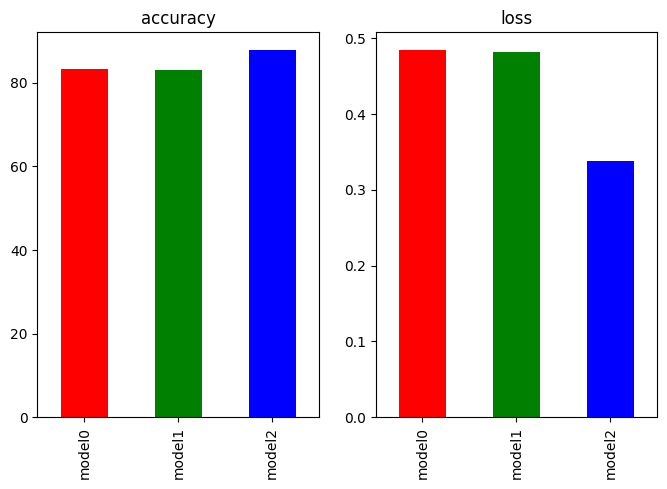

In [71]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
colors = ['red', 'green', 'blue']
compare_results['accuracy'].plot(kind = 'bar', color = colors)
plt.title('accuracy')
plt.subplot(1,2,2)
compare_results['loss'].plot(kind = 'bar', color = colors)
plt.title('loss')

# **plot the predicted images**

In [72]:
# torch.manual_seed(42)
total_images = len(test_dataset)
total_images

10000

In [73]:
indexes = torch.randperm(total_images)[:9]
indexes

tensor([2967, 2940, 6463, 6061, 2991, 9925,   39, 4160, 9627])

In [74]:
len(test_dataset[1])

2

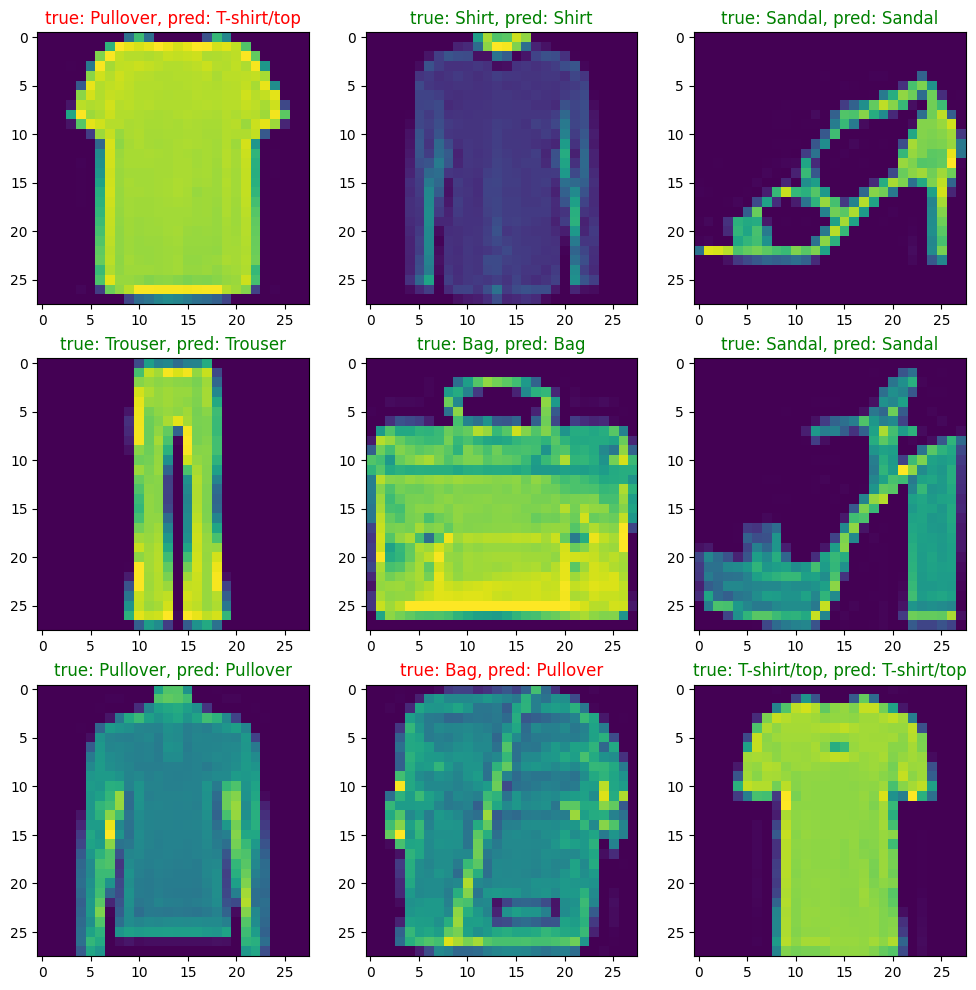

In [75]:
indexes = torch.randperm(total_images)[:9]
indexes
plt.figure(figsize= (12,12))
for i in range (len(indexes)):
  model2.eval()
  with torch.inference_mode():
    image, true_label = test_dataset[indexes[i]]
    y_logits = model2(image.unsqueeze(dim = 0))
  plt.subplot(3,3,i+1)
  plt.imshow(image.squeeze())
  y_pred = y_logits.argmax(dim = 1)
  if true_label == y_pred.item():
    c = 'green'
  else:
    c = 'red'
  plt.title(f'true: {classes[true_label]}, pred: {classes[y_pred]}', color = c)


In [76]:
model2.eval()
y_preds = []
y_true = []
with torch.inference_mode():
  for image, true_label in test_dataset:
    y_logits = model2(image.unsqueeze(dim = 1))
    y_predict = y_logits.argmax(dim = 1)
    y_preds.append(y_predict)
    y_true.append(true_label)



In [77]:
y_preds[0]

tensor([9])

In [78]:
from sklearn.metrics import confusion_matrix as cm


In [79]:
mat = cm(y_true, y_preds)

In [80]:
mat

array([[872,   3,  27,  30,   2,   1,  58,   0,   7,   0],
       [  0, 975,   2,  19,   3,   0,   0,   0,   1,   0],
       [ 17,   0, 918,   8,  31,   0,  26,   0,   0,   0],
       [ 23,   8,  29, 904,  22,   0,  10,   0,   4,   0],
       [  3,   1, 200,  29, 692,   0,  75,   0,   0,   0],
       [  1,   0,   0,   2,   0, 972,   0,  14,   4,   7],
       [185,   2, 154,  34,  49,   0, 564,   0,  12,   0],
       [  0,   0,   0,   0,   0,  17,   0, 959,   1,  23],
       [  0,   1,  15,   5,   3,   0,   5,   4, 966,   1],
       [  0,   0,   0,   0,   0,  11,   1,  39,   1, 948]])

<Axes: >

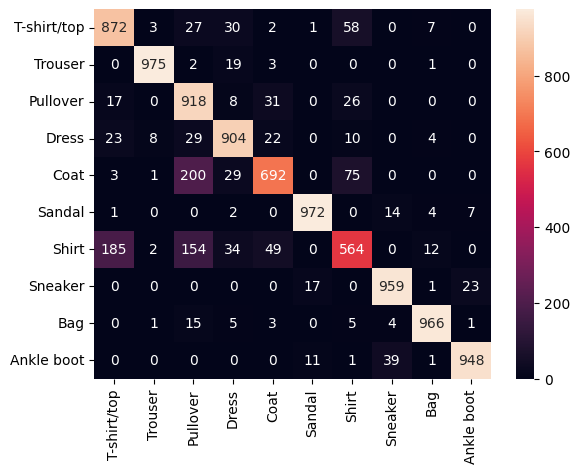

In [81]:
import seaborn as sns
sns.heatmap(mat, xticklabels= classes,fmt = 'd', yticklabels= classes, annot= True)

Save the model

In [82]:
from pathlib import Path

In [83]:
Model_path = Path('models')
Model_path.mkdir(parents = True, exist_ok = True)


In [84]:
model_name = 'best_performing_model'
save_path = Model_path/model_name

print(f'saving the model as {save_path}')
torch.save(obj = model2.state_dict(),
           f = save_path)

saving the model as models/best_performing_model


In [85]:
load_model2 = FashionMNSTv2(input_shape = 1, hidden_layer = 10, output_shape = len(classes))
load_model2.load_state_dict(torch.load(f = save_path))
print('model loaded succesfully')

model loaded succesfully


<ipython-input-85-fe980b82c191>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model2.load_state_dict(torch.load(f = save_path))


In [86]:
loss_fn = nn.CrossEntropyLoss()

In [87]:
loaded_model_results = eval_model(load_model2, 'loaded_model', test_data, loss_fn,optimizer)
loaded_model_results

{'accuracy': 87.71964856230032,
 'loss': 0.3383421697460424,
 'model_name': 'loaded_model'}

In [88]:
loss_fn = nn.CrossEntropyLoss()

In [89]:
model2_results = eval_model(model2, 'model2', test_data, loss_fn, _)

In [90]:
model2_results

{'accuracy': 87.71964856230032,
 'loss': 0.3383421697460424,
 'model_name': 'model2'}

In [93]:
torch.isclose(torch.tensor(loaded_model_results['accuracy']), torch.tensor(model2_results['accuracy']))

tensor(True)